# Distancias cosmológicas (Numérica)

#### Hugo Rivera Morales
#### Cosmología

In [1]:
# Paqueterias
import numpy as np
from sympy import *
import matplotlib.pyplot as plt #Basicas
from math import log
from math import e
import math

In [2]:
#Variables
eta = np.linspace(0, -10, 100) #eta = ln(a)
a = np.exp(eta)
z = 1/a - 1

#Gamma de cada componente \gamma = 1 + w
Gl = 0 #LCDM
Gm, Gr, Gk = 1, 4/3, 2/3

#Condiciones iniciales
Om0 = 0.3
Or0 = 1e-4
Ok0 = 0
Ol0 = 1 - Om0 - Or0 - Ok0

#CPL models:
omega_0, omega_a = 0.9, 0.5

#Constantes
H0 = 68 #cte de Hubble
c = 1 #Velocidad de la luz

#Raadio actual del universo R0
def R0(Ok0): 
  if Ok0 == 0:
    return 1
  elif Ok0 != 0:
    return  1/(H0*np.sqrt(abs(Ok0)))

### 1) Densidades

$$\Omega_i' = 3(\Pi - \gamma_i)\Omega_i$$

Donde: $\Pi = \sum \gamma_i\Omega_i$, y la notación primada representa derivadas con respecto al parámetro "e-fold" $\eta = \ln(a)$.

In [3]:
#Solution
from scipy.integrate import odeint
def odes(x, eta):

    # Asigna a cada ODE a un elemento de un vector
    Om = x[0]
    Or = x[1]
    Ol = x[2]
    Ok = x[3]

    # define cada ODE, se descomenta la que se utilizará (no supe como hacerlo para los 3 casos a la vez)

    # 1) CPL model: z/(1+z)

    # dMdt = 3*((Gm*Om+Gr*Or+(1 + omega_0 + (1 - np.exp(eta))*omega_a)*Ol+Gk*Ok)-Gm)*Om
    # dRdt = 3*((Gm*Om+Gr*Or+(1 + omega_0 + (1 - np.exp(eta))*omega_a)*Ol+Gk*Ok)-Gr)*Or
    # dLdt = 3*((Gm*Om+Gr*Or+(1 + omega_0 + (1 - np.exp(eta))*omega_a)*Ol+Gk*Ok)-(1 + omega_0 + (1 - np.exp(eta))*omega_a))*Ol
    # dKdt = 3*((Gm*Om+Gr*Or+(1 + omega_0 + (1 - np.exp(eta))*omega_a)*Ol+Gk*Ok)-Gk)*Ok

    # # 2) CPL model: zln(1+z)

    # dMdt = 3*((Gm*Om+Gr*Or+(1 - omega_0 - eta*omega_a)*Ol+Gk*Ok)-Gm)*Om
    # dRdt = 3*((Gm*Om+Gr*Or+(1 - omega_0 - eta*omega_a)*Ol+Gk*Ok)-Gr)*Or
    # dLdt = 3*((Gm*Om+Gr*Or+(1 - omega_0 - eta*omega_a)*Ol+Gk*Ok)-(1 - omega_0 - eta*omega_a))*Ol
    # dKdt = 3*((Gm*Om+Gr*Or+(1 - omega_0 - eta*omega_a)*Ol+Gk*Ok)-Gk)*Ok

    # LCDM modols

    dMdt = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gm)*Om
    dRdt = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gr)*Or
    dLdt = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gl)*Ol
    dKdt = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gk)*Ok
    

    return [dMdt, dRdt, dLdt, dKdt]

# condiciones iniciales
x0 = [Om0, Or0, Ol0, Ok0]

# declara a un time vector
x = odeint(odes,x0,eta)

Om = x[:,0]
Or = x[:,1]
Ol = x[:,2]
Ok = x[:,3]

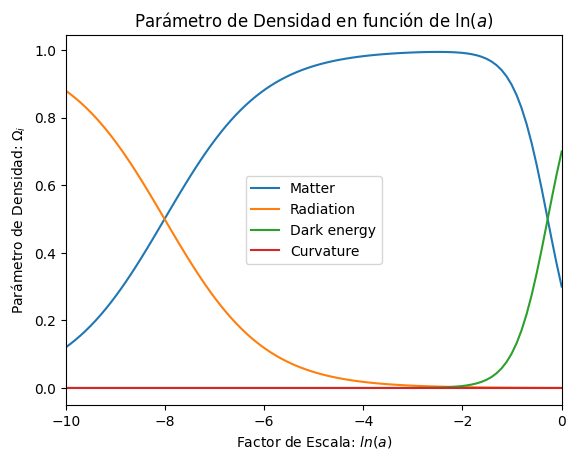

In [4]:
#Ploteado densidades
plt.plot(eta,x[:,0],label='Matter')
plt.plot(eta,x[:,1],label='Radiation')
plt.plot(eta,x[:,2],label='Dark energy')
plt.plot(eta,x[:,3],label='Curvature')
plt.ylabel('Parámetro de Densidad: $\\Omega_i$')
plt.xlabel('Factor de Escala: $ln(a)$')
plt.legend(loc='best')
plt.xlim([-10, 0])
plt.title("Parámetro de Densidad en función de $\ln(a$)")
plt.show()

### 2) Parámetro de Hubble y Desaceleración

Para encontrar el parámetro $H(z)$ se utiliza la ecuación:

$$\Omega_i = \Omega_{i,0}\left(\frac{H_0}{H} \right)^{2}a^{-3\gamma_i}$$

Por otro lado, para encontrar  el parámetro $q(z)$ se utiliza:

$$q(z) = \frac{1}{2}\sum\Omega_i(3\gamma_i-2)$$

In [5]:
#Hubble Parameter
def Hubble_a(a):
    return (H0**2)*(Om0/Om)*(np.abs(a)**(-3))

def Hubble_z(z):
    return (H0**2)*(Om0/Om)*(np.abs(1+z)**(3))

H_a = np.sqrt(Hubble_a(a))
H_z = np.sqrt(Hubble_z(z))

#Parámetro de desaceleración
def deceleration():
    return  1/2*(Om+2*Or-2*Ol)
q = deceleration()

In [12]:
H_z.shape

(100,)

#### **Gráficas**

C:\Users\hugor\AppData\Local\Temp\ipykernel_40344\1594954677.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 5])


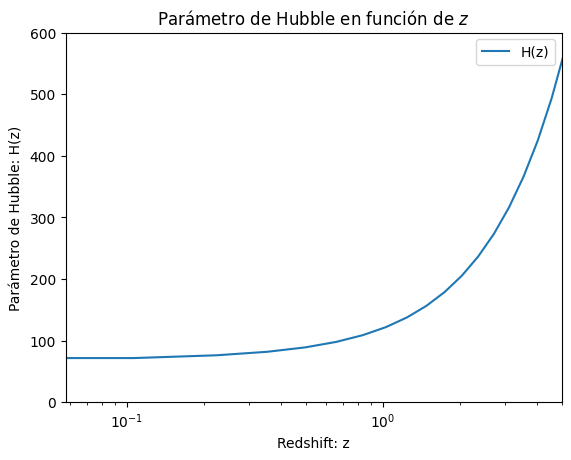

C:\Users\hugor\AppData\Local\Temp\ipykernel_40344\1594954677.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 1])


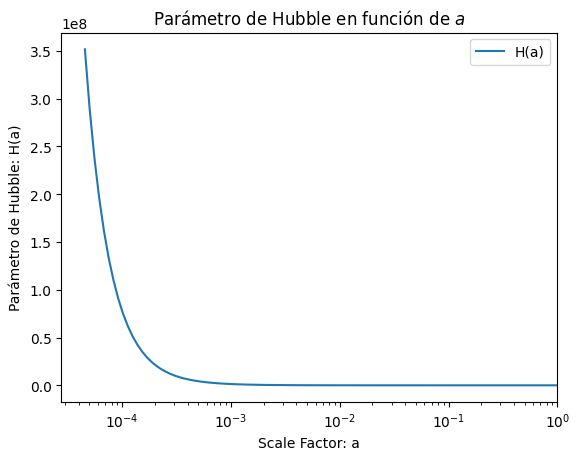

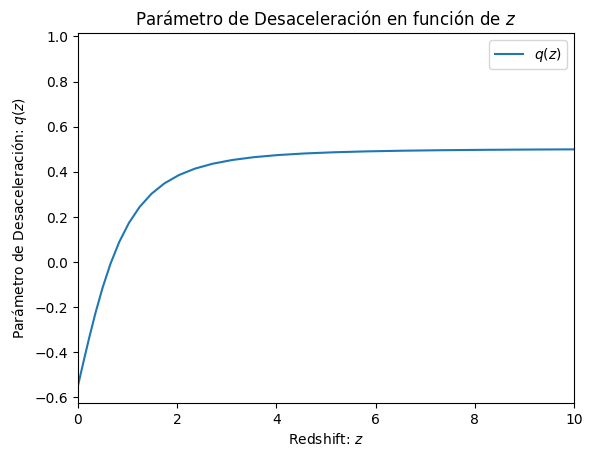

In [6]:
#Ploteando H(z)
plt.semilogx(z,H_z,label='H(z)')
plt.ylabel('Parámetro de Hubble: H(z)')
plt.xlabel('Redshift: z')
plt.legend(loc='best')
plt.ylim([0, 600])
plt.xlim([0, 5])
plt.title("Parámetro de Hubble en función de $z$")
plt.show()

#Ploteando H(a)
plt.semilogx(a,H_a,label='H(a)')
plt.ylabel('Parámetro de Hubble: H(a)')
plt.xlabel('Scale Factor: a')
plt.legend(loc='best')
plt.xlim([0, 1])
plt.title("Parámetro de Hubble en función de $a$")
plt.show()

#Ploteando q(z)
plt.plot(z,q,label='$q(z)$')
plt.ylabel('Parámetro de Desaceleración: $q(z)$')
plt.xlabel('Redshift: $z$')
plt.legend(loc='best')
plt.title("Parámetro de Desaceleración en función de $z$")
plt.xlim([0, 10])
plt.show()

## 3) Distancias
#### *Distancia comovil:*
$$\chi_e = \frac{c}{R_0}\int_0^z\frac{dz'}{H(z')}$$

#### *Distancia lumínosa:*
$$d_L = (1+z)R_0S_k(\chi)$$

#### *Distancia angular:*
$$d_A = \frac{R_0S_k(\chi)}{(1+z)}$$

Donde las constantes $R_0$ y $S_k(\chi)$ están definidas como:

$$R_0 = \frac{1}{H_0 \sqrt{|\Omega_{k,0}|}}$$

$$

S_{k}(\chi)= \left\{ \begin{array}{lcc}
            \sin(\chi) &   si  & \Omega_{k,0} < 0 \\
             \\ \chi &  si & \Omega_{k,0} = 0 \\
            \\ \sinh(\chi) &  si  & \Omega > 0
             \end{array}
   \right.
   $$

In [7]:
#Interpolación de la función H_z 
from scipy.interpolate import InterpolatedUnivariateSpline #para poder integrar los arreglos a una función

x = z #variable independiente x
y = H_z #variable dependiente f(x)

f_interp = InterpolatedUnivariateSpline(x, y, k=3)
f_interp #nombre de la interpolación, el k=3 es de el orden del polinomio

#Calculo de la distancia comovil
from functools import partial
from scipy.integrate import quad

def E(z):
    result = 1/(f_interp(z))
    return result #se define una función 1/H(z)


#Distancias
#Distancia comovil 
def X_e(z):
  return c/(H0*R0(Ok0))*(np.array(list(map(partial(quad, E, 0), z)))[:, 0])

#Distancia lumínica 
def d_L(z):
  # return (z+1)*X_e(z)*R0(Ok0)
  if Ok0 == 0:
    return (z+1)*X_e(z)*R0(Ok0)
  elif Ok0 < 0:
    return (z+1)*np.sinh(X_e(z))*R0(Ok0)
  if Ok0 > 0:
    return (z+1)*np.sin(X_e(z))*R0(Ok0)

#Distancia angular 
def d_A(z):
  # return X_e(z)*R0(Ok0)/(1+z)
  if Ok0 == 0:
    return X_e(z)*R0(Ok0)/(1+z)
  elif Ok0 < 0:
    return np.sinh(X_e(z))*R0(Ok0)/(1+z)
  if Ok0 > 0:
    return np.sin(X_e(z))*R0(Ok0)/(1+z)

#### **Gráfica**

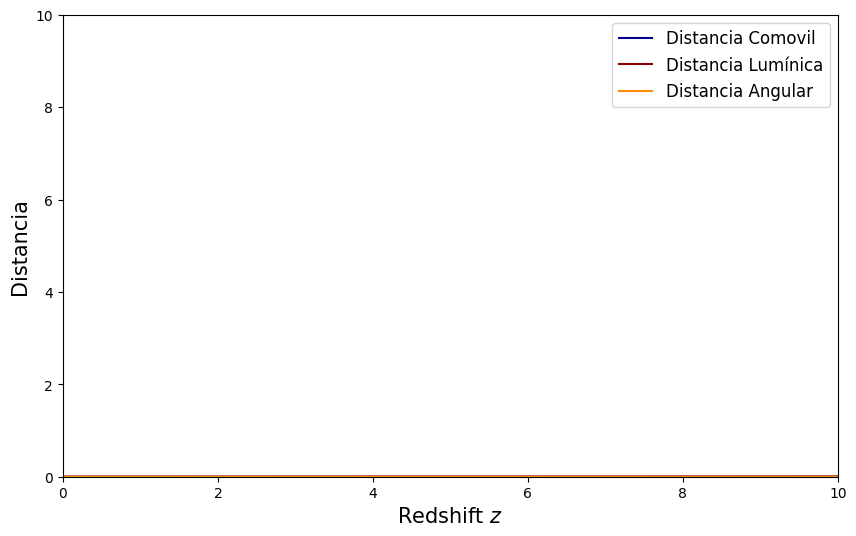

In [10]:
#Ploteando distancias
plt.figure(figsize=(10,6))
plt.plot(z,X_e(z), color='darkblue', label='Distancia Comovil')
plt.plot(z,d_L(z), color='darkred', label='Distancia Lumínica')
plt.plot(z,d_A(z), color='darkorange', label='Distancia Angular')
plt.xlabel('Redshift $z$', size=15)
plt.ylabel('Distancia', size=15)
plt.legend(fontsize=12)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()